#  Forecast oil price evolution
## Asset: WTI Crude Oil Spot Price Cushing, OK
### Example of Time Series Analysis with python

Created on Jun 02 13:33:22 2016
Author: Alvaro Calle Cordon

## Motivation

Why do I do this?
- just for fun
- because I need to practise python and learn pandas
- just to help other students in my way

## Libraries

Some important libraries I'll be probably using:

- [Statsmodels](http://statsmodels.sourceforge.net/)
- [Pandas](http://pandas.pydata.org/)
- [Numpy](http://www.numpy.org/)
- [Matplotlib](http://matplotlib.org/)
- [Scipy](https://www.scipy.org/)

In [107]:
# imports
import sys
import csv as csv 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random as random
import statsmodels.formula.api as smf
from scipy import optimize

# this allows plots to appear directly in the notebook
%matplotlib inline

## Example: WTI Crude Oil Spot Price Cushing, OK

I get the data for Oil prices from 2014-01-01 until current date from [Quantdl](https://www.quandl.com/) and download the .csv file ("EIA-PET_RWTC_D.csv")

In [108]:
# read data into a DataFrame
CSV_FILE = "EIA-PET_RWTC_D.csv"

price_ts = pd.read_csv(CSV_FILE, parse_dates='Date', dayfirst=False, index_col = 0)
print price_ts.describe()
price_ts.shape

            Value
count  610.000000
mean    65.160541
std     25.894305
min     26.190000
25%     44.642500
50%     54.920000
75%     95.327500
max    107.950000


(610, 1)

We also calculate the monthly avereged oil price

In [109]:
# Monthly price average:
price_per_month_ts = price_ts.resample("M").mean()

Let's make a plot of the time series and see if we observe any trend in the data.

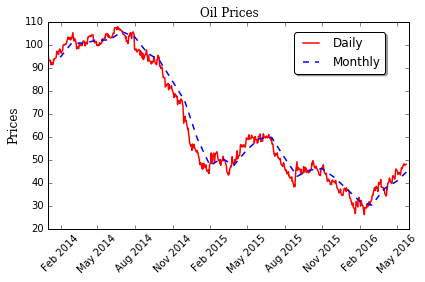

In [110]:
# Plot style settings
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
#xlabel('Dates',  fontdict=font)
plt.ylabel('Prices', fontdict=font)
plt.xticks(rotation=45)
plt.title('Oil Prices', fontdict=font)
plt.plot(price_ts.index, price_ts, linestyle='-',  color='r', linewidth=1.5, label= 'Daily')
plt.plot(price_per_month_ts.index, price_per_month_ts, linestyle='--', color='b', linewidth=1.5, label= 'Monthly')
plt.legend(loc='right', bbox_to_anchor=(.95, 0.85), ncol=1, fancybox=True, shadow=True)
plt.tight_layout()
plt.grid(False)
plt.show()

## Questions About the Data

- Steep fall in prices starting May 2014

  We can see that the Oil price has been falling since May 2014. There has been several Economic indicators that try to explain this trend. See for example the following article [Why did oil prices drop so much in 2014?](http://www.investopedia.com/ask/answers/030315/why-did-oil-prices-drop-so-much-2014.asp).

  
- Fluctuation in 2014

  There has been a period of fall and raise in prices in 2015. A discussion about these fluctuations can be found here 
[Why are oil prices fluctuating?](http://www.business-standard.com/article/economy-policy/why-are-oil-prices-fluctuating-115041401159_1.html)


- Current trend

  There is a trend in 2016 that looks like a sign of a modest revival [Oil Prices Explained Signs of a Modest Revival](http://www.nytimes.com/interactive/2016/business/energy-environment/oil-prices.html?_r=0)
  
It is clear that a lot of political factors and global economy may influence oil price but we are not going to discuss it here.

Let us try to forecast future oil prices via linear regression first. We'll go to a more sophisticated model later.

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Prices!

Let's use pyhon `statsmodels` to estimate the regression coefficients. I'll do two different fits. In the first one we consider all the data from 2014 to 2016. Because this fit takes into account a broader time period, it is not very realistic because it'll give us a **rather** general overview of the price trend. The other fit considers a bullish position in which prices are expected to continue with the trend of 2016. 

I would like to point out that prices are affected by other factors, such as global economic conditions, and these should be included in the form of regressors. Here we do a very simplistic analysis.

In [111]:
# Linear regression (Fit 1)
df = price_ts.reset_index()
df['days'] = list(reversed(range(price_ts.shape[0])))
lm_fit = smf.ols('Value ~ days', data = df).fit()
trend_ts = pd.DataFrame({'Date': df['Date'], 'lm': lm_fit.fittedvalues})
trend_ts = trend_ts.set_index('Date')
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     3057.
Date:                Thu, 02 Jun 2016   Prob (F-statistic):          2.38e-239
Time:                        13:35:44   Log-Likelihood:                -2302.1
No. Observations:                 610   AIC:                             4608.
Df Residuals:                     608   BIC:                             4617.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    106.0214      0.854    124.190      0.000       104.345   107.698
days          -0.1342      0.002    -55.290      0.000        -0.139    -0.129
==============================================================================
Omnibus:                        8.789   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.678
Skew:                          -0.263   Prob(JB):                       0.0130
Kurtosis:                       2.745   Cond. No.                         703.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
# Linear regression (Fit 2)
df2 = df[df['Date']>'2016']
lm_fit2 = smf.ols('Value ~ days', data = df2).fit()
trend2016_ts = pd.DataFrame({'Date': df2['Date'], 'lm': lm_fit2.fittedvalues})
trend2016_ts = trend2016_ts.set_index('Date')
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     383.9
Date:                Thu, 02 Jun 2016   Prob (F-statistic):           2.58e-35
Time:                        13:35:45   Log-Likelihood:                -236.14
No. Observations:                  98   AIC:                             476.3
Df Residuals:                      96   BIC:                             481.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -69.6926      5.453    -12.781      0.000       -80.516   -58.869
days           0.1904      0.010     19.593      0.000         0.171     0.210
==============================================================================
Omnibus:                        5.014   Durbin-Watson:                   0.244
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.426
Skew:                           0.273   Prob(JB):                       0.0663
Kurtosis:                       4.015   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot of the time series and predictions

We can see in the following plot that the two regressions give diametrically opposed predictions. According to the 2016 trend, the linear regression would predict a raise in oil prices in the future.

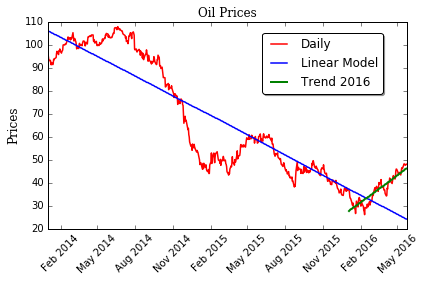

In [113]:
#xlabel('Dates',  fontdict=font)
plt.ylabel('Prices', fontdict=font)
plt.xticks(rotation=45)
plt.title('Oil Prices', fontdict=font)
plt.plot(price_ts.index, price_ts, linestyle='-', color='r', linewidth=1.5, label= 'Daily')
plt.plot(trend_ts.index, trend_ts, linestyle='-', color='b', linewidth=1.5, label= 'Linear Model')
plt.plot(trend2016_ts.index, trend2016_ts, linestyle='-', color='g', linewidth=2, label= 'Trend 2016')
plt.legend(loc='right', bbox_to_anchor=(.95, 0.8), ncol=1, fancybox=True, shadow=True)
plt.tight_layout()
plt.grid(False)
plt.show()

## Autoregressive analysis with GARCH(1,1)

The series that we are analyzing is closing price of Oil from 2014 to 2016. We can define the returns as the ratio of the difference in price at $t$ and $t-1$ to the closing price at $t-1$.

\begin{eqnarray}
R_t = \frac{P_{t+1} - P_t}{P_t}\, .
\end{eqnarray}

We can smooth out this relation by taking the difference between the natural logarithms, i.e., $r_t = \log(P_{t+1}) - \log(P_t)$. The returns is a function highly variable with time, mostly with a random character. We define the following function:

In [114]:
# Returns
def Returns(df):

    (m,n) = df.shape

    return_df = pd.DataFrame(np.nan, index=range(0,m), columns=range(0,n))
    return_df.index = df.index

    for t in range(1,m): # rows loop
        for k in range(0,n): # columns
#            return_df.iloc[t,k] = (df.iloc[t,k] - df.iloc[t-1,k])/df.iloc[t-1,k]
            return_df.iloc[t,k] = np.log(df.iloc[t,k]/df.iloc[t-1,k])
            return_df.iloc[t,k] = return_df.iloc[t,k]*100. # precent %
        
    return return_df

We calculate the percentage of returns and its main statistics (mean, standard deviation, quantiles, ...)

In [115]:
returns = Returns(price_ts)
returns = returns.dropna()

#returns.head()
returns.describe()

,0
count,609.000000
mean,0.111930
std,2.684284
min,-11.289222
25%,-1.087964
50%,0.150005
75%,1.457377
max,11.125756


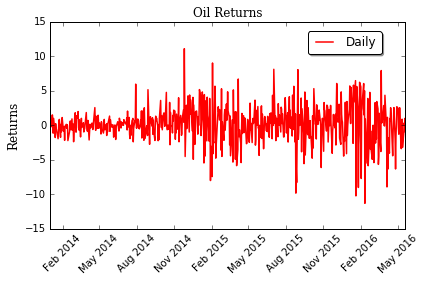

In [116]:
#xlabel('Dates',  fontdict=font)
plt.ylabel('Returns', fontdict=font)
plt.xticks(rotation=45)
plt.title('Oil Returns', fontdict=font)
plt.plot(returns.index, returns, linestyle='-', color='r', linewidth=1.5, label= 'Daily')
plt.legend(loc='right', bbox_to_anchor=(.95, 0.9), ncol=1, fancybox=True, shadow=True)
plt.tight_layout()
plt.grid(False)
plt.show()

We can now estimate the risk of this series. One measure of the risk would be the sensitivity to the changes in oil price, therefore, as a first approximation to access the level of risk, we can consider the standard deviation of the returns.

However, we can construct a more sophisticated model of risk. It is quite natural to think that the risk at time $t$ can be affected by the movements at earlier times (returns and risks). If we keep things simple, and we only care about what happened the day before, we can construct the following model of risk **GARCH(1,1)**:
\begin{equation}
\sigma_t^2 = \gamma + \alpha\ r_{t-1}^2 + \beta\ \sigma_{t-1}^2\, .
\end{equation}
Obviously, this model can be extended to include *p* measures of rentability, and *q* measures of risk at earlier times *t-2, t-3, ...*. In general this is considered the GARCH(p,q) model. A very nice presentation of this model (and other topics) can be found in [Quantatrisk](http://www.quantatrisk.com/2013/03/30/garchpq-model-and-exit-strategy-for-intraday-algorithmic-traders/).

To find the parameters $(\gamma, \alpha, \beta)$ I will find the maximum of the likelihooh function, defined as,
\begin{eqnarray}
\log L = -\left\lbrace \sum_{i} \log \sigma^2_i + \frac{r^2_i}{\sigma^2_i} \right\rbrace \,.
\end{eqnarray}
This implies the assumption of considering the returns being normally distributed random variables $r_t \sim N(\mu, \sigma_t)$, where $\mu$ is the mean return over the period that we are considering. Let us check our assumptions by plotting the histogram of (normed) returns together with the normal distribution.

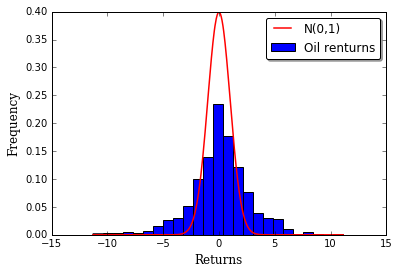

In [117]:
plt.xlabel('Returns',  fontdict=font)
plt.ylabel('Frequency', fontdict=font)

Dates = returns.index
r = returns.iloc[:,0]

r.tolist()
rnorm = (r - np.mean(r))/np.std(r)
d = {'rnorm' : rnorm}
rnorm_df = pd.DataFrame(d, index=Dates)

r = sorted(r.tolist())
#m = np.mean(r)
#s = np.std(r)
#x = np.linspace(-3,3,100)
#g = stats.norm.pdf(r,m,s)
g = stats.norm.pdf(r,0,1)

plt.hist(r, bins=25, normed=True, label='Oil renturns')
plt.plot(r, g, linestyle='-', color='r', linewidth=1.5, label='N(0,1)')
plt.legend(loc='upper right', bbox_to_anchor=(1., 1.), ncol=1, fancybox=True, shadow=True)

Next, we perform a minimization of the likelihood function in order to find the $\alpha$, $\beta$ and $\gamma$ parameters in the auto-regressive model. To do so we create a GARCH(1,1) likelihood function:

In [118]:
def GARCH11_logL(param, r):
    gamma, alpha, beta = param
    n = len(r)
    s = np.ones(n)*0.01
    s[2] = np.var(r[0:3]) # care here is the variance!
    for i in range(3, n):
        s[i] = gamma + alpha*r[i-1]**2 + beta*(s[i-1]) 
        + gamma**2 + alpha**2 + beta**2 # Shrink coefficients
    logL = - sum(-np.log(s) - np.power(r,2)/s) 
    return logL

o = optimize.fmin(GARCH11_logL,np.array([.1,.1,.1]), args=(r,), full_output=1)
R = np.abs(o[0])
print
print(" **** Best result ****")
print(" omega = %.6f\n alpha = %.6f\n beta  = %.6f" % (R[0], R[1], R[2]))
print(" *********************")

Optimization terminated successfully.
         Current function value: 23972.311156
         Iterations: 231
         Function evaluations: 444

 **** Best result ****
 omega = 0.000011
 alpha = 1.219888
 beta  = 0.303673
 *********************


Our risk model is then:
\begin{eqnarray}
% omega = 0.000011 alpha = 1.2199 beta  = 0.3037
\sigma^2_t = 0.000011 + 1.2199 \ r^2_{t-1} + 0.3037\ \sigma^2_{t-1}\, .
\end{eqnarray}

We now apply this risk model to our time series.

## Predicting future prices with GARCH(1,1)

We now turn to predicting the price movement beyond the last date registered in our data, which is, 

In [119]:
returns.index[0]

Timestamp('2016-05-20 00:00:00')

We define the `risk_model` function bellow, which gives us the volatility at time *t* given data until *t-3*.

In [120]:
def risk_model(param, r):
    # returns variance
    gamma, alpha, beta = param
    n = len(r)
    s = np.ones(n)*0.01
    s[2] = np.var(r[0:3])
    for i in range(3, n):
        s[i] = gamma + alpha*r[i-1]**2 + beta*(s[i-1]) 
    return s

par = [R[0], R[1], R[2]]

# Last days returns:
r3t = returns.iloc[0:3,0]
s3t = np.sqrt(risk_model(par, r3t))

st = s[0]
mu = np.mean(rt)

# Generate a random variates N(mu, sigma)
random.normalvariate(mu, st)

-0.13245594994323873

This last random variate would give us an idea of the **return** on 2016-05-21. We can continue exprapolating returns based on previous estimates, and also calculating prices.